<a href="https://colab.research.google.com/github/JonathanCornish/Netflix-Scrape/blob/master/Wikipedia_Netflix_Scrape_v02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the future I'll incorporate the following improvements to this code:

1.   Automate title naming by webscraping the title vs doing it manually
2.   Calculate total hours of content vs no. shows
3.   Add in a bar for upcoming shows / films / comedies
4.   Sum up totals across each category i.e. Film, Shows and Comedies (for both number of shows as well as total content hours)
5.   Scrape content $$$ spend from Netflix's 10-K




In [21]:
import requests
import re
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
import pandas as pd

In [23]:
orig_show_url = "https://en.wikipedia.org/wiki/List_of_Netflix_original_programming"
orig_film_url = "https://en.wikipedia.org/wiki/List_of_Netflix_original_films"
orig_comedy_url = "https://en.wikipedia.org/wiki/List_of_Netflix_original_stand-up_comedy_specials"

In [28]:
def Scrape_Netflix(wikipedia_url, table_number, chart_title):
  all_tables = pd.read_html(wikipedia_url, attrs = {"class": "wikitable"})
  # for table in all_tables:
  table = all_tables[table_number]
  
  # change the Premiere column from object to string:
  table['Premiere'] = table['Premiere'].astype('string')
  # from several columns above we see that there is a line showing not a date but 'Awaiting release', which throws off our calculation.
  # let's create a new data table which deletes any line where the word 'Awaiting' appears within the Premiere column:
  table_2 = table[~table.Premiere.str.contains("Awaiting")]
  # note that we may need to add in more code here for table that have things like 'TBA' etc, or just the year for upcoming releases...
  # leaving empty for now... may need to add code in here later
  # use regular expressions in Pandas to replace any digits or characters within brackets, as well as any brackets themselves:
  table_3 = table_2.replace(to_replace = "\[([A-Za-z0-9_]+)\]", value = '', regex = True)
  table_3['Premiere2'] = table_3['Premiere'].str.replace("\[([A-Za-z0-9_]+)\]", '', regex = True)
  # let's convert the Premiere column into a new column called 'Release-Date' which shows the release year in date-time-format:
  table_3['Release-Date'] = pd.to_datetime(table_3['Premiere2'])
  # create a new column called 'Release-Year' based off of the year
  table_3['Release-Year'] = pd.DatetimeIndex(table_3['Release-Date']).year
  # let's put all this data into a dictionary that we can later print:
  years_movies_dict = {}
  for year in range(2012,2021):
    if year in list(table_3['Release-Year']):
      movie_count = {year: table_3['Release-Year'].value_counts()[year]}
      years_movies_dict.update(movie_count)
    else:
      movie_count = {year: 0}
      years_movies_dict.update(movie_count)
  keys = list(years_movies_dict.keys())
  values = list(years_movies_dict.values())
  # Plotting a bar graph of the number of comedy specials each year using the lists we created above
  plt.figure(figsize=(10,5))
  sns.barplot(keys, values, alpha=0.8)
  plt.title(chart_title)
  plt.ylabel('No. of Comedy Special Originals Released', fontsize=12)
  plt.xlabel('Year', fontsize=12)
  plt.show()

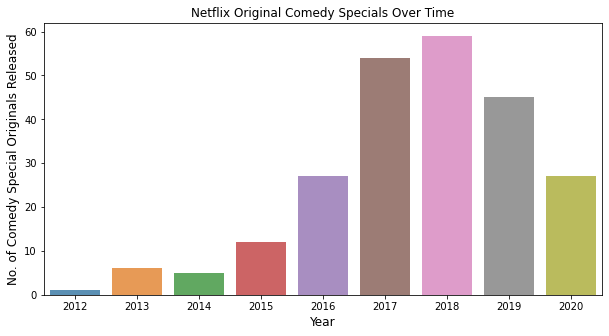

In [29]:
Scrape_Netflix(orig_comedy_url, 0, 'Netflix Original Comedy Specials Over Time')

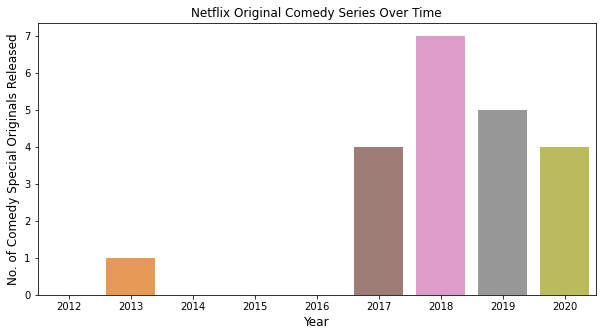

In [30]:
Scrape_Netflix(orig_comedy_url, 1, 'Netflix Original Comedy Series Over Time')

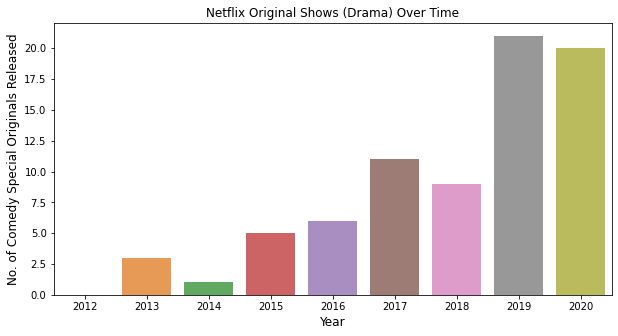

In [31]:
Scrape_Netflix(orig_show_url, 0, 'Netflix Original Shows (Drama) Over Time')

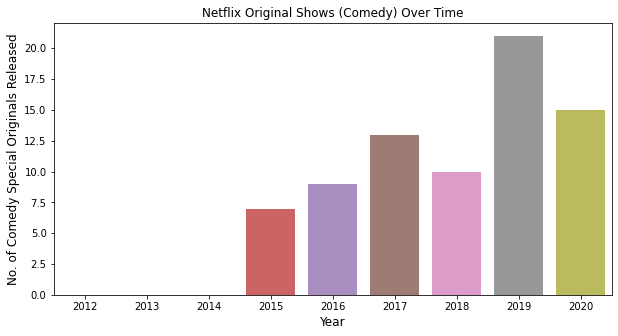

In [32]:
Scrape_Netflix(orig_show_url, 1, 'Netflix Original Shows (Comedy) Over Time')

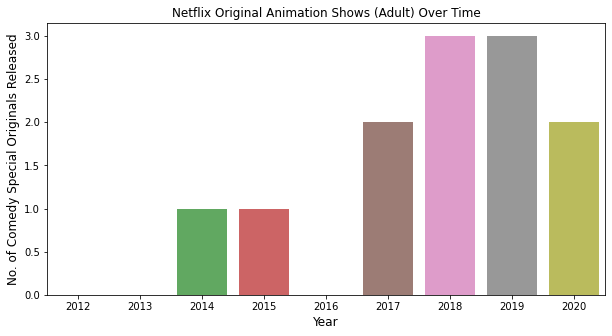

In [33]:
Scrape_Netflix(orig_show_url, 2, 'Netflix Original Animation Shows (Adult) Over Time')

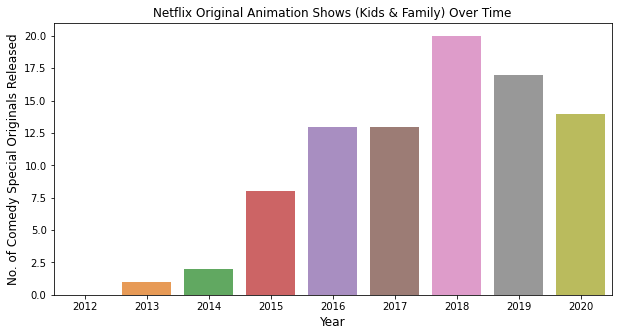

In [34]:
Scrape_Netflix(orig_show_url, 3, 'Netflix Original Animation Shows (Kids & Family) Over Time')

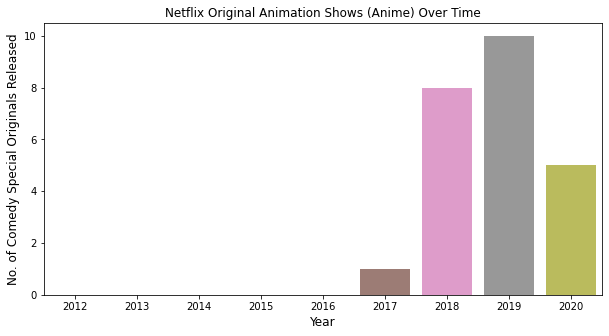

In [35]:
Scrape_Netflix(orig_show_url, 4, 'Netflix Original Animation Shows (Anime) Over Time')

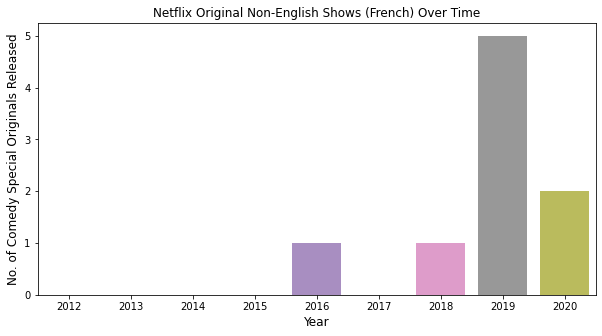

In [36]:
Scrape_Netflix(orig_show_url, 5, 'Netflix Original Non-English Shows (French) Over Time')

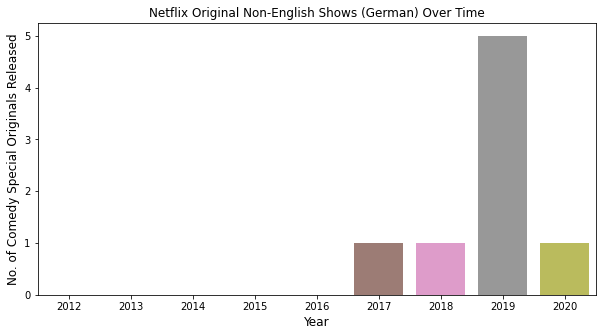

In [37]:
Scrape_Netflix(orig_show_url, 6, 'Netflix Original Non-English Shows (German) Over Time')

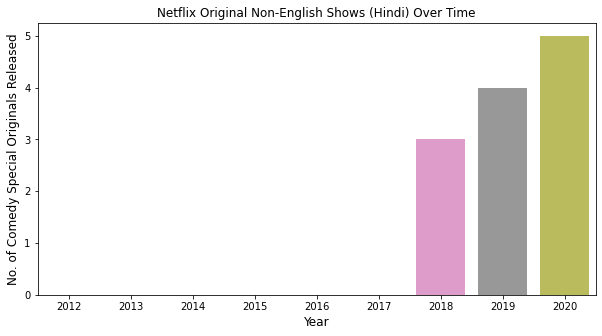

In [38]:
Scrape_Netflix(orig_show_url, 7, 'Netflix Original Non-English Shows (Hindi) Over Time')

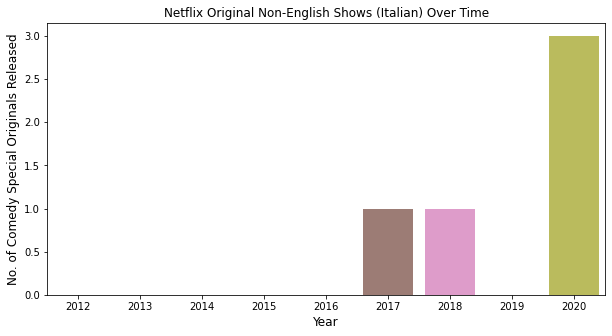

In [39]:
Scrape_Netflix(orig_show_url, 8, 'Netflix Original Non-English Shows (Italian) Over Time')

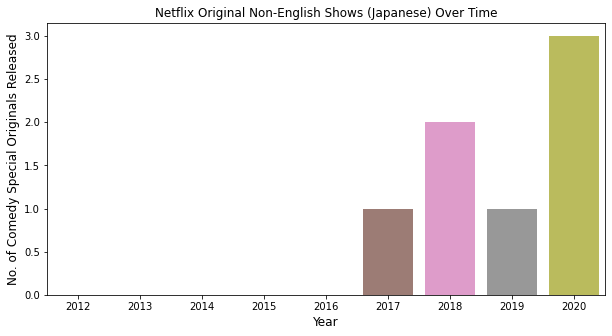

In [40]:
Scrape_Netflix(orig_show_url, 9, 'Netflix Original Non-English Shows (Japanese) Over Time')

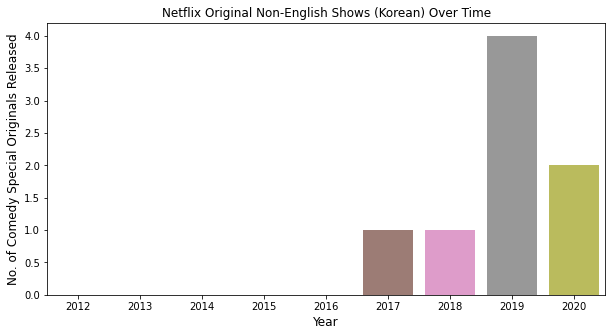

In [41]:
Scrape_Netflix(orig_show_url, 10, 'Netflix Original Non-English Shows (Korean) Over Time')

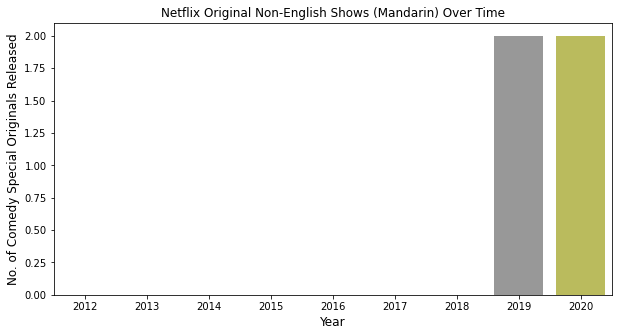

In [42]:
Scrape_Netflix(orig_show_url, 11, 'Netflix Original Non-English Shows (Mandarin) Over Time')

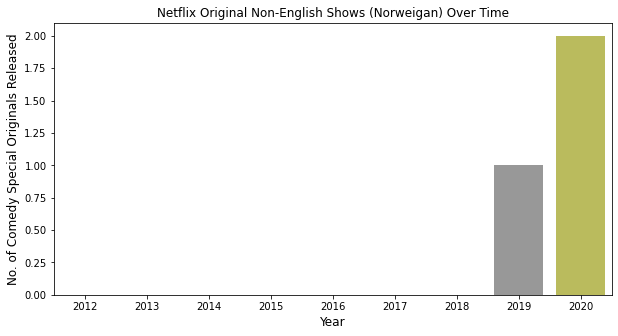

In [43]:
Scrape_Netflix(orig_show_url, 12, 'Netflix Original Non-English Shows (Norweigan) Over Time')

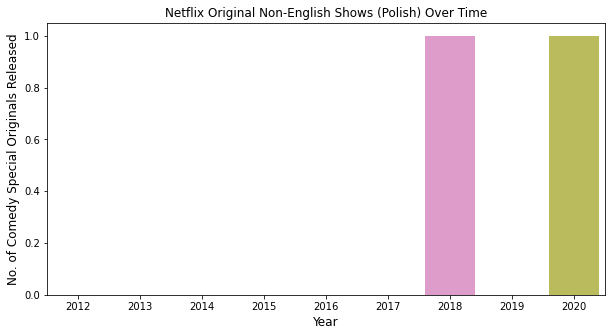

In [44]:
Scrape_Netflix(orig_show_url, 13, 'Netflix Original Non-English Shows (Polish) Over Time')

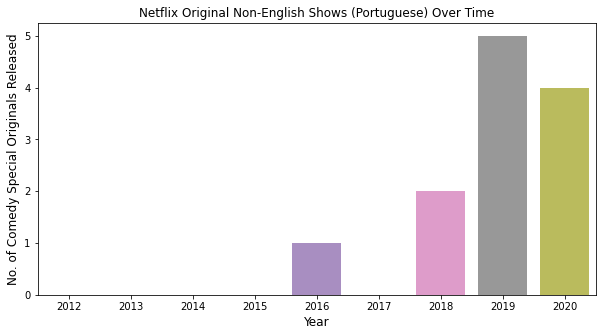

In [45]:
Scrape_Netflix(orig_show_url, 14, 'Netflix Original Non-English Shows (Portuguese) Over Time')

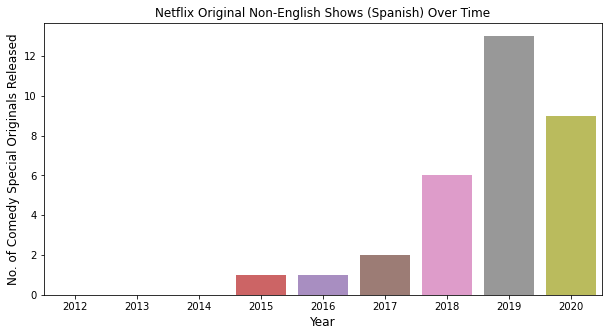

In [46]:
Scrape_Netflix(orig_show_url, 15, 'Netflix Original Non-English Shows (Spanish) Over Time')

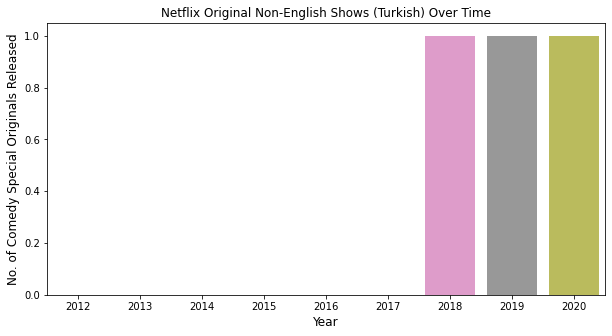

In [47]:
Scrape_Netflix(orig_show_url, 16, 'Netflix Original Non-English Shows (Turkish) Over Time')

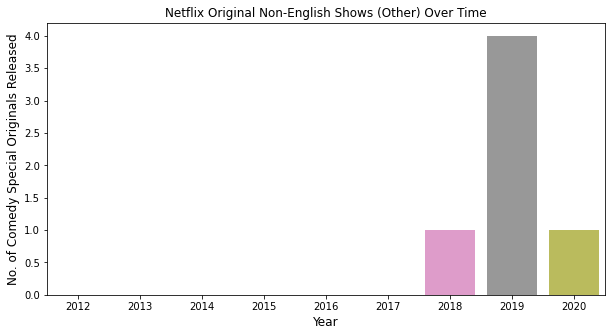

In [48]:
Scrape_Netflix(orig_show_url, 17, 'Netflix Original Non-English Shows (Other) Over Time')

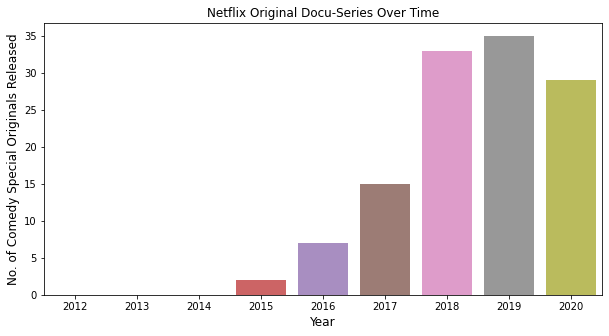

In [49]:
Scrape_Netflix(orig_show_url, 18, 'Netflix Original Docu-Series Over Time')

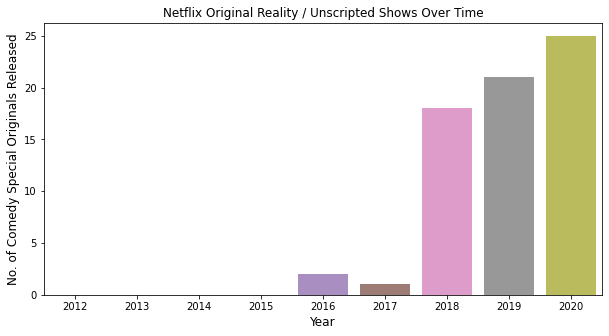

In [50]:
Scrape_Netflix(orig_show_url, 19, 'Netflix Original Reality / Unscripted Shows Over Time')

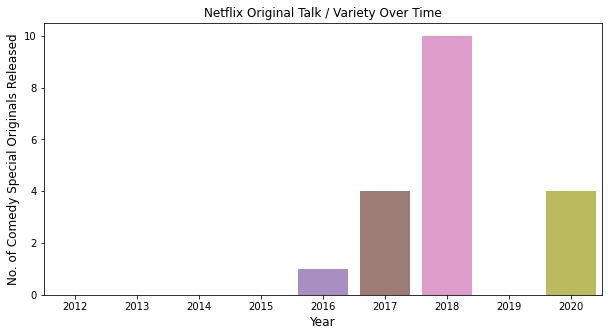

In [51]:
Scrape_Netflix(orig_show_url, 20, 'Netflix Original Talk / Variety Over Time')

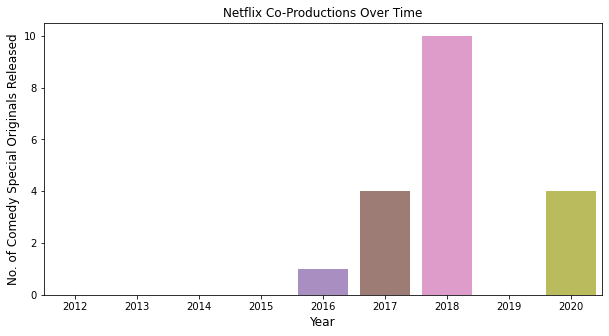

In [52]:
Scrape_Netflix(orig_show_url, 20, 'Netflix Co-Productions Over Time')
# these shows have been commissioned by Netflix in cooperation with a partner from another country

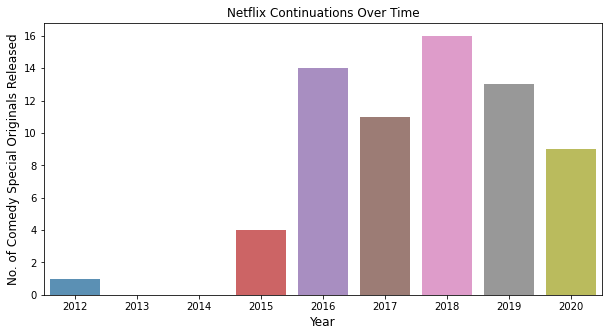

In [53]:
Scrape_Netflix(orig_show_url, 21, 'Netflix Continuations Over Time')
# these shows have been picked up by Netflix for additional seasons after having aired previous seasons on another network

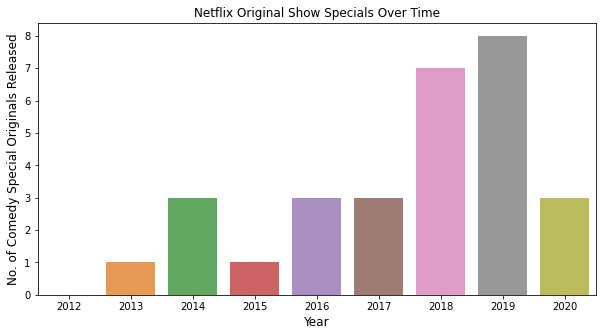

In [54]:
Scrape_Netflix(orig_show_url, 22, 'Netflix Original Show Specials Over Time')
# these shows are one-time original events related to original TV shows

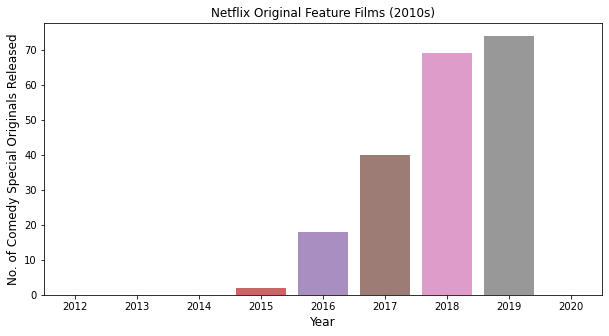

In [55]:
Scrape_Netflix(orig_film_url, 0, 'Netflix Original Feature Films (2010s)')

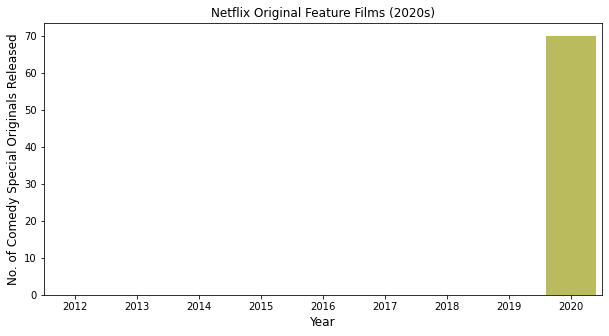

In [56]:
Scrape_Netflix(orig_film_url, 1, 'Netflix Original Feature Films (2020s)')

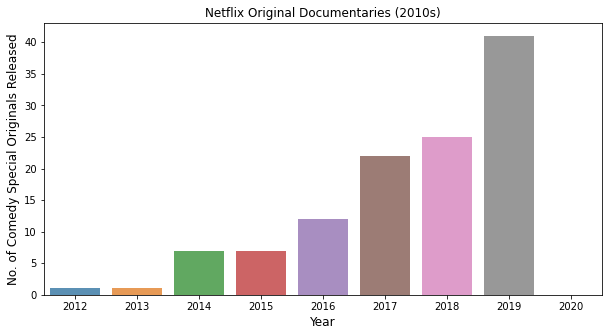

In [57]:
Scrape_Netflix(orig_film_url, 3, 'Netflix Original Documentaries (2010s)')

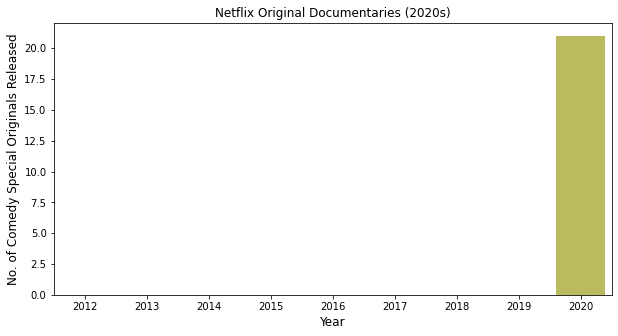

In [58]:
Scrape_Netflix(orig_film_url, 4, 'Netflix Original Documentaries (2020s)')

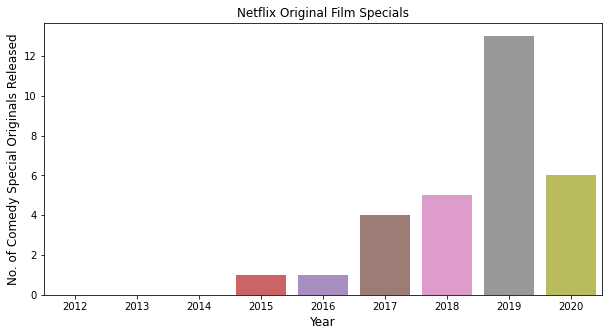

In [59]:
Scrape_Netflix(orig_film_url, 6, 'Netflix Original Film Specials')
# these films are one-time original events or supplementary content related to original films

In [60]:
Scrape_Netflix(orig_film_url, 8, 'Netflix Original Feature Films (Exclusive International Distribution, 2010s)')

In [ ]:
Scrape_Netflix(orig_film_url, 8, 'Netflix Original Feature Films (Exclusive International Distribution, 2020s)')